In [271]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [272]:
India= pd.read_stata('/Users/abhaindurkar/Desktop/India Ferlity.dta')

This project is based on women fertility status data from India. I aim to investigate what factors related to mother's fertility, or family, educational bacground explain the female child mortality among this sample.

In [273]:
India.head(5)

,idno,state,dist,tehs,villn,hhnum,hhmember,sc4c,sc5,sc6,...,nosch3,stopsch1,stopsch2,stopsch3,workinc,wrkincyr,everuse,momlit,dadlit,toilet
0,1010008.0,TamilNad,Coimbato,Pollachi,1,8,4,2,mainlivg,wood,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1010040.0,TamilNad,Coimbato,Pollachi,1,40,4,1,seproom,wood,...,NaN,P Disapr,0,NaN,yes,yes,yes,no,no,1.0
2,1010064.0,TamilNad,Coimbato,Pollachi,1,64,4,2,seproom,wood,...,NaN,No inter,0,NaN,yes,yes,yes,no,yes,1.0
3,1010065.0,TamilNad,Coimbato,Pollachi,1,65,5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,1010068.0,TamilNad,Coimbato,Pollachi,1,68,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [274]:
India.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2446 entries, 0 to 2445
Columns: 949 entries, idno to toilet
dtypes: category(785), float32(15), float64(143), int16(1), int8(3), object(2)
memory usage: 4.7+ MB


In [275]:
India.info(6)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2446 entries, 0 to 2445
Data columns (total 949 columns):
idno        float32
state       category
dist        category
tehs        category
villn       int8
hhnum       int16
hhmember    int8
sc4c        category
sc5         category
sc6         category
sc7         category
sc7a        category
sc7bh       category
sc7bm       float64
sc8         category
sc9         category
sc10        category
sc11        category
sc12        category
sc13        category
sc14        category
erkeyer     object
emoddate    float32
ere4        float32
erg15a      category
erk6t       float32
erl7        object
ernum       float64
erstate     category
erdist      category
erteh       category
ervill      float64
erhno       float64
erwlno      float64
erday       float64
ermonth     category
erresult    category
ervisit     float64
era1h       float64
era1m       float64
erb1        category
erb2        category
erb3        category
erb4        float

In [276]:
India.shape

(2446, 949)

In [277]:
India.drop(['erstate','erdist','ervill','erteh', 'erhno','erkeyer'], axis=1, inplace=True)

In [278]:
India.drop(['sc4c','sc5', 'sc7bm','emoddate', 'erl7' ,'ernum', 'erb10d','erb10c','erc12', 'erb6a'], axis=1, inplace=True)

In [279]:
India = India.rename(index=str, columns={ "erb13": "Religion", "erb14": "SC-ST", "erb14a": "Castes", "erb14b": "Tribe", "erb15": "wife_age",})

In [280]:
India.tail()

,idno,state,dist,tehs,villn,hhnum,hhmember,sc6,sc7,sc7a,...,nosch3,stopsch1,stopsch2,stopsch3,workinc,wrkincyr,everuse,momlit,dadlit,toilet
2441,4281309.0,UttPrade,Meerut,Bagpat,28,1309,10,cowdung,handpump,0,...,0,NaN,NaN,NaN,no,no,no,no,no,1.0
2442,4281316.0,UttPrade,Meerut,Bagpat,28,1316,6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2443,4281320.0,UttPrade,Meerut,Bagpat,28,1320,5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2444,4281327.0,UttPrade,Meerut,Bagpat,28,1327,6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2445,4281531.0,UttPrade,Meerut,Bagpat,28,1531,6,cowdung,handpump,0,...,NaN,Married,0,NaN,no,no,yes,no,yes,1.0


In [281]:
India.describe()

,idno,villn,hhnum,hhmember,ere4,erk6t,erwlno,erday,ervisit,era1h,...,erk8h,erk8m,erl1lno,erl1wght,erl2lno,erl2wght,erl3lno,erl3wght,mominlaw,toilet
count,2446.00,2446.000000,2446.000000,2446.000000,2446.000000,1842.000000,1941.000000,1941.000000,1941.000000,1842.000000,...,1842.000000,1842.000000,787.000000,787.000000,131.000000,131.000000,1.0,1.0,2446.000000,2446.0
mean,2368838.50,10.031889,744.306623,5.656173,2615.987305,20360.798828,2.701700,14.808346,1.047913,12.946254,...,13.923996,25.651466,3.337992,229.227446,2.984733,333.641221,4.0,40.0,0.312347,1.0
std,1096552.75,8.137105,636.492414,2.826246,1538.862305,28042.371094,1.629351,8.788310,0.247195,2.114033,...,2.104464,17.578168,2.134204,340.279428,2.166119,395.803818,NaN,NaN,0.463545,0.0
min,1010008.00,1.000000,1.000000,1.000000,0.000000,1050.000000,1.000000,1.000000,1.000000,7.000000,...,8.000000,0.000000,1.000000,15.000000,1.000000,39.000000,4.0,40.0,0.000000,1.0
25%,1110280.75,3.000000,174.000000,4.000000,2615.968018,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.0
50%,2150055.00,7.000000,517.500000,5.000000,2615.968018,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.0
75%,3061735.00,17.000000,1262.750000,7.000000,2615.968018,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.0
max,4281531.00,28.000000,2480.000000,31.000000,48000.000000,568400.000000,23.000000,31.000000,3.000000,19.000000,...,20.000000,59.000000,11.000000,999.000000,10.000000,999.000000,4.0,40.0,1.000000,1.0


In [282]:
#This data set includes fertility and health status, demographics and information of households in india. 
# The data contains both eligible respondents(females) and their husbands answers to the questions on fertility on the above questions
# In order to analysize which varibales best explain the girl child mortality
# My dependent varibale is death rate of girl child, I wish to explore the data 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() ## We are going to normalize



In [283]:
India = India.rename(index=str, columns={ "erc10":"girls_death","erb4":"wife_edu","erb13":"Religion","sc6":"fuel_used","sc7":"source_water","sc9":"tiolet_type","sc8":"boil_water","erb2":"Years_livedinvillage",})

In [284]:
India = India.rename(index=str, columns={ "erb12": "edu_wifemom","erc9":"boys_death","erb17":"number_marriagewife","erb17b":"age_marriagewife","erc2":"sons","erc4":"daughters","erc8":"dead_children",})

In [285]:
India = India.rename(index=str, columns={ "erc11": "total_children","erc13":"stillbirth","erb13a":"abortions","erb13bs":"spontaneos_abortions","erb13bi":"induced_abortions","erd1c3":"Used_pills",})

In [286]:
India = India.rename(index=str, columns={ "erd1c2":"been_sterilized","erc25g":"Idealnumber_girls","erc25b":"Idealnumber_boys",
           "e2e1e":"Work_hours","e1e1g":"Remuneration","e1e1e":"usual_working hours","e1e1c":"Class_work","erg15a":"Dowrypaid","sc14":"house_condtion","ere4":"mom_income","erf4e1":"wife_bargaining","erf4e2":"hus_bargaining",})

In [287]:
India.head()

,idno,state,dist,tehs,villn,hhnum,hhmember,fuel_used,source_water,sc7a,...,nosch3,stopsch1,stopsch2,stopsch3,workinc,wrkincyr,everuse,momlit,dadlit,toilet
0,1010008.0,TamilNad,Coimbato,Pollachi,1,8,4,wood,handpump,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1010040.0,TamilNad,Coimbato,Pollachi,1,40,4,wood,handpump,0,...,NaN,P Disapr,0,NaN,yes,yes,yes,no,no,1.0
2,1010064.0,TamilNad,Coimbato,Pollachi,1,64,4,wood,handpump,0,...,NaN,No inter,0,NaN,yes,yes,yes,no,yes,1.0
3,1010065.0,TamilNad,Coimbato,Pollachi,1,65,5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,1010068.0,TamilNad,Coimbato,Pollachi,1,68,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


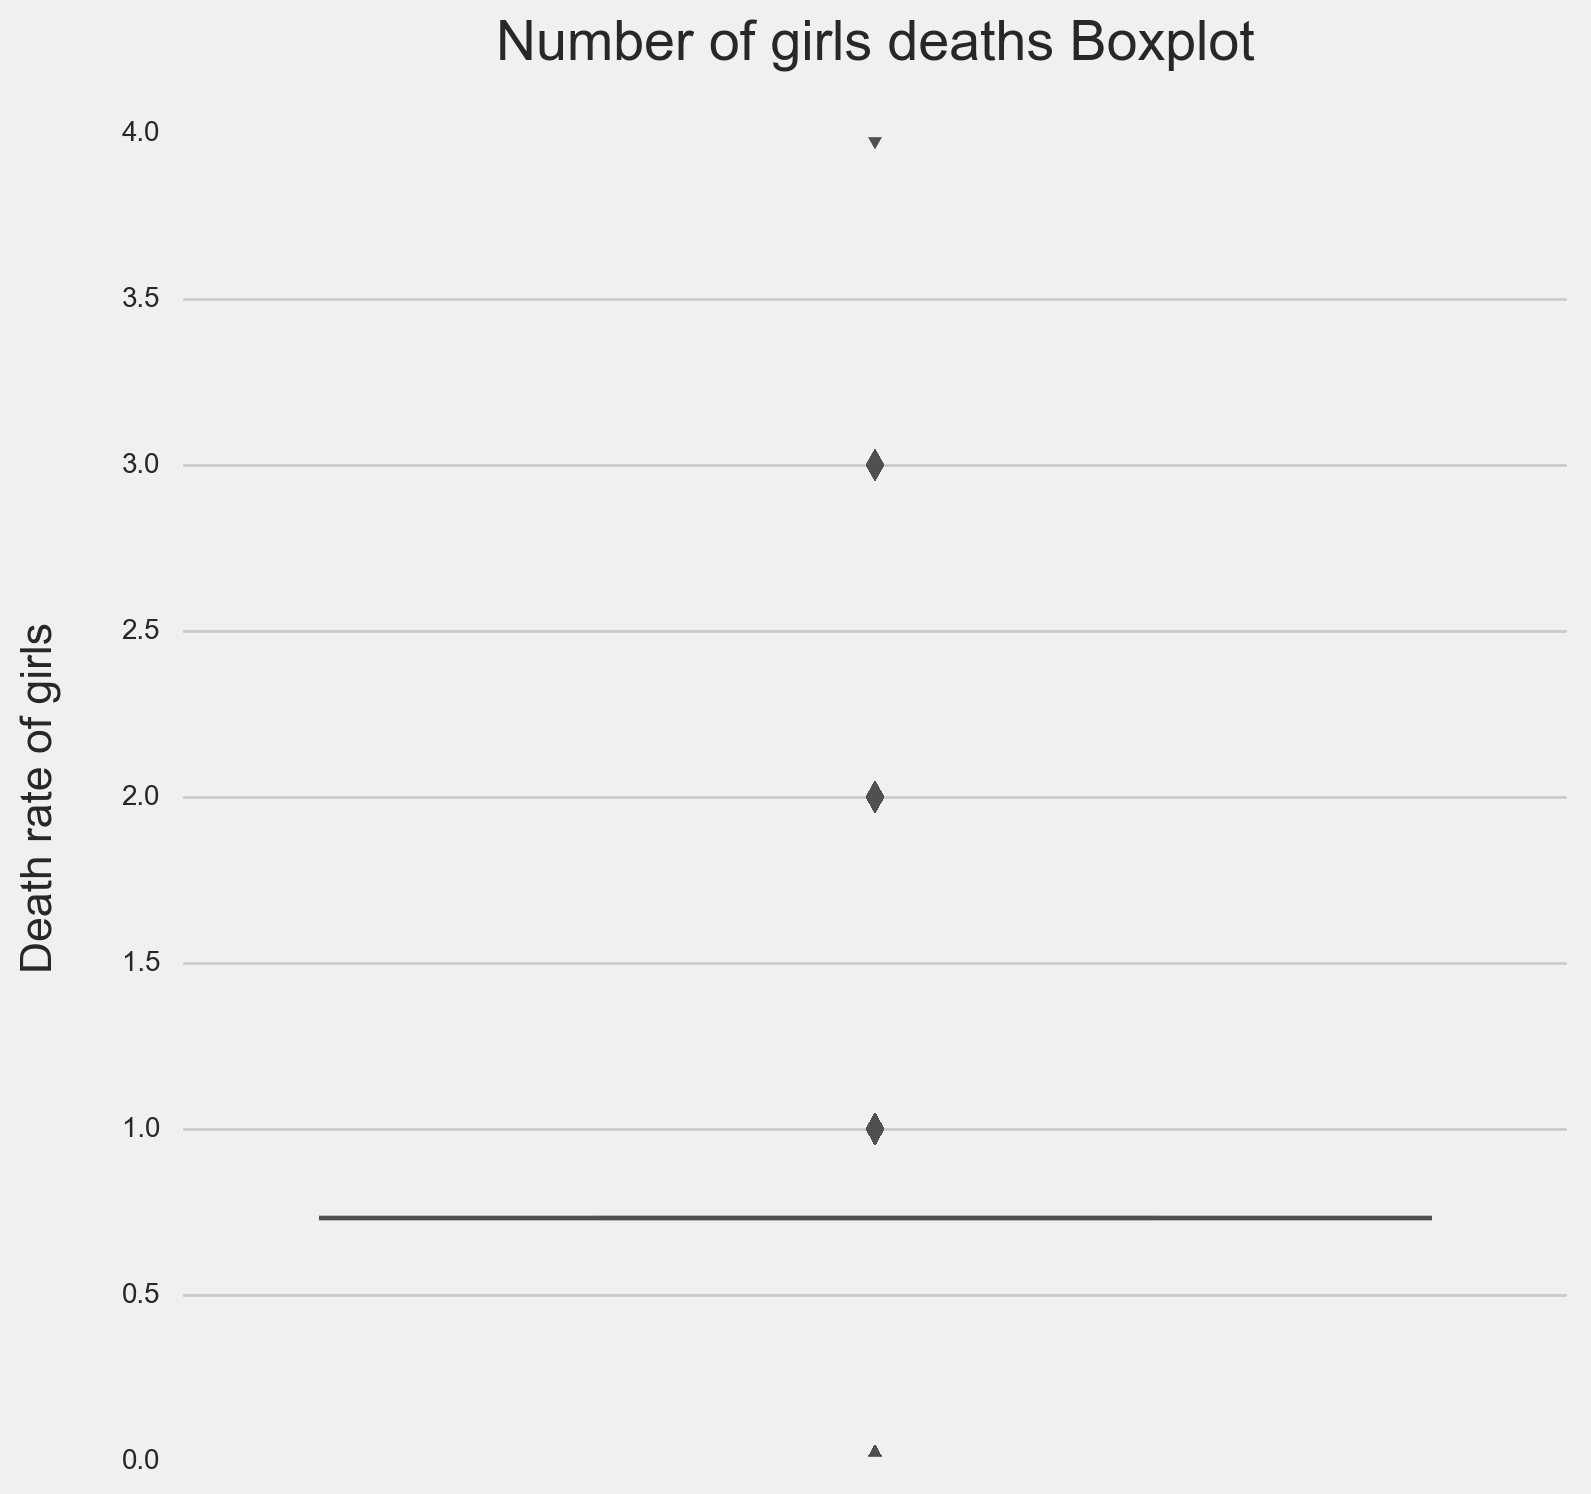

In [288]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()

sns.boxplot(India.girls_death, orient='v',
            fliersize=8, linewidth=1.5, notch=True,
            saturation=0.5, ax=ax)

ax.set_ylabel('Death rate of girls\n', fontsize=16)
ax.set_title('Number of girls deaths Boxplot\n', fontsize=20)

plt.show()


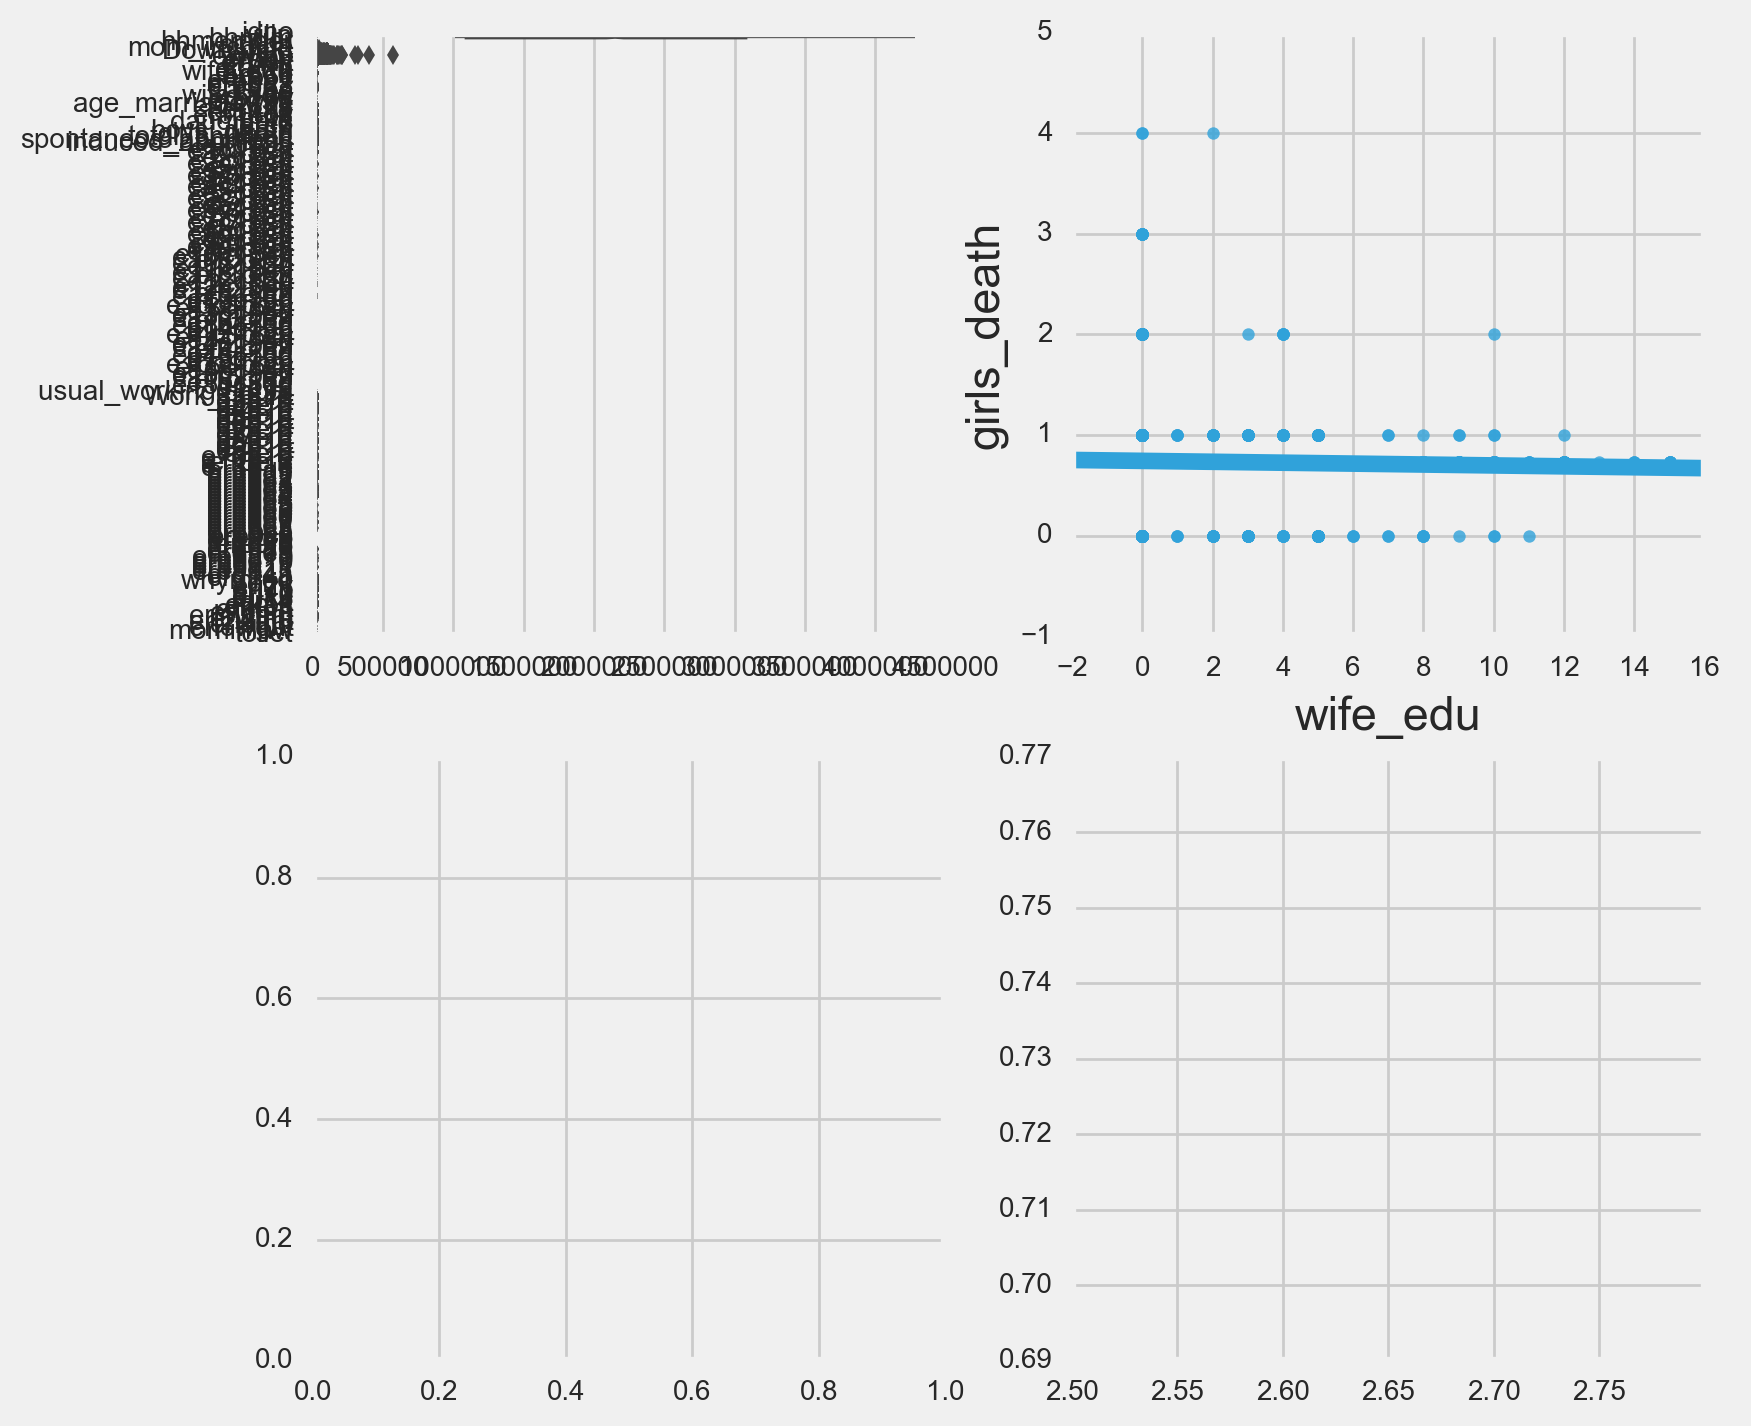

In [289]:
fig, axarr = plt.subplots(2, 2, figsize=(8,8),
                         sharex=False, sharey=False)
#ax = fig.gca()

axarr[0,0] = sns.boxplot(data=India, orient='h',
            fliersize=5, linewidth=3, notch=True, 
            saturation=0.5, ax=axarr[0,0])

axarr[0,1] = sns.regplot(India.wife_edu, India.girls_death, ax=axarr[0,1])

plt.show()


In [290]:
#Here we can see that there is negative correlation between mother's education and number of girl's deaths.

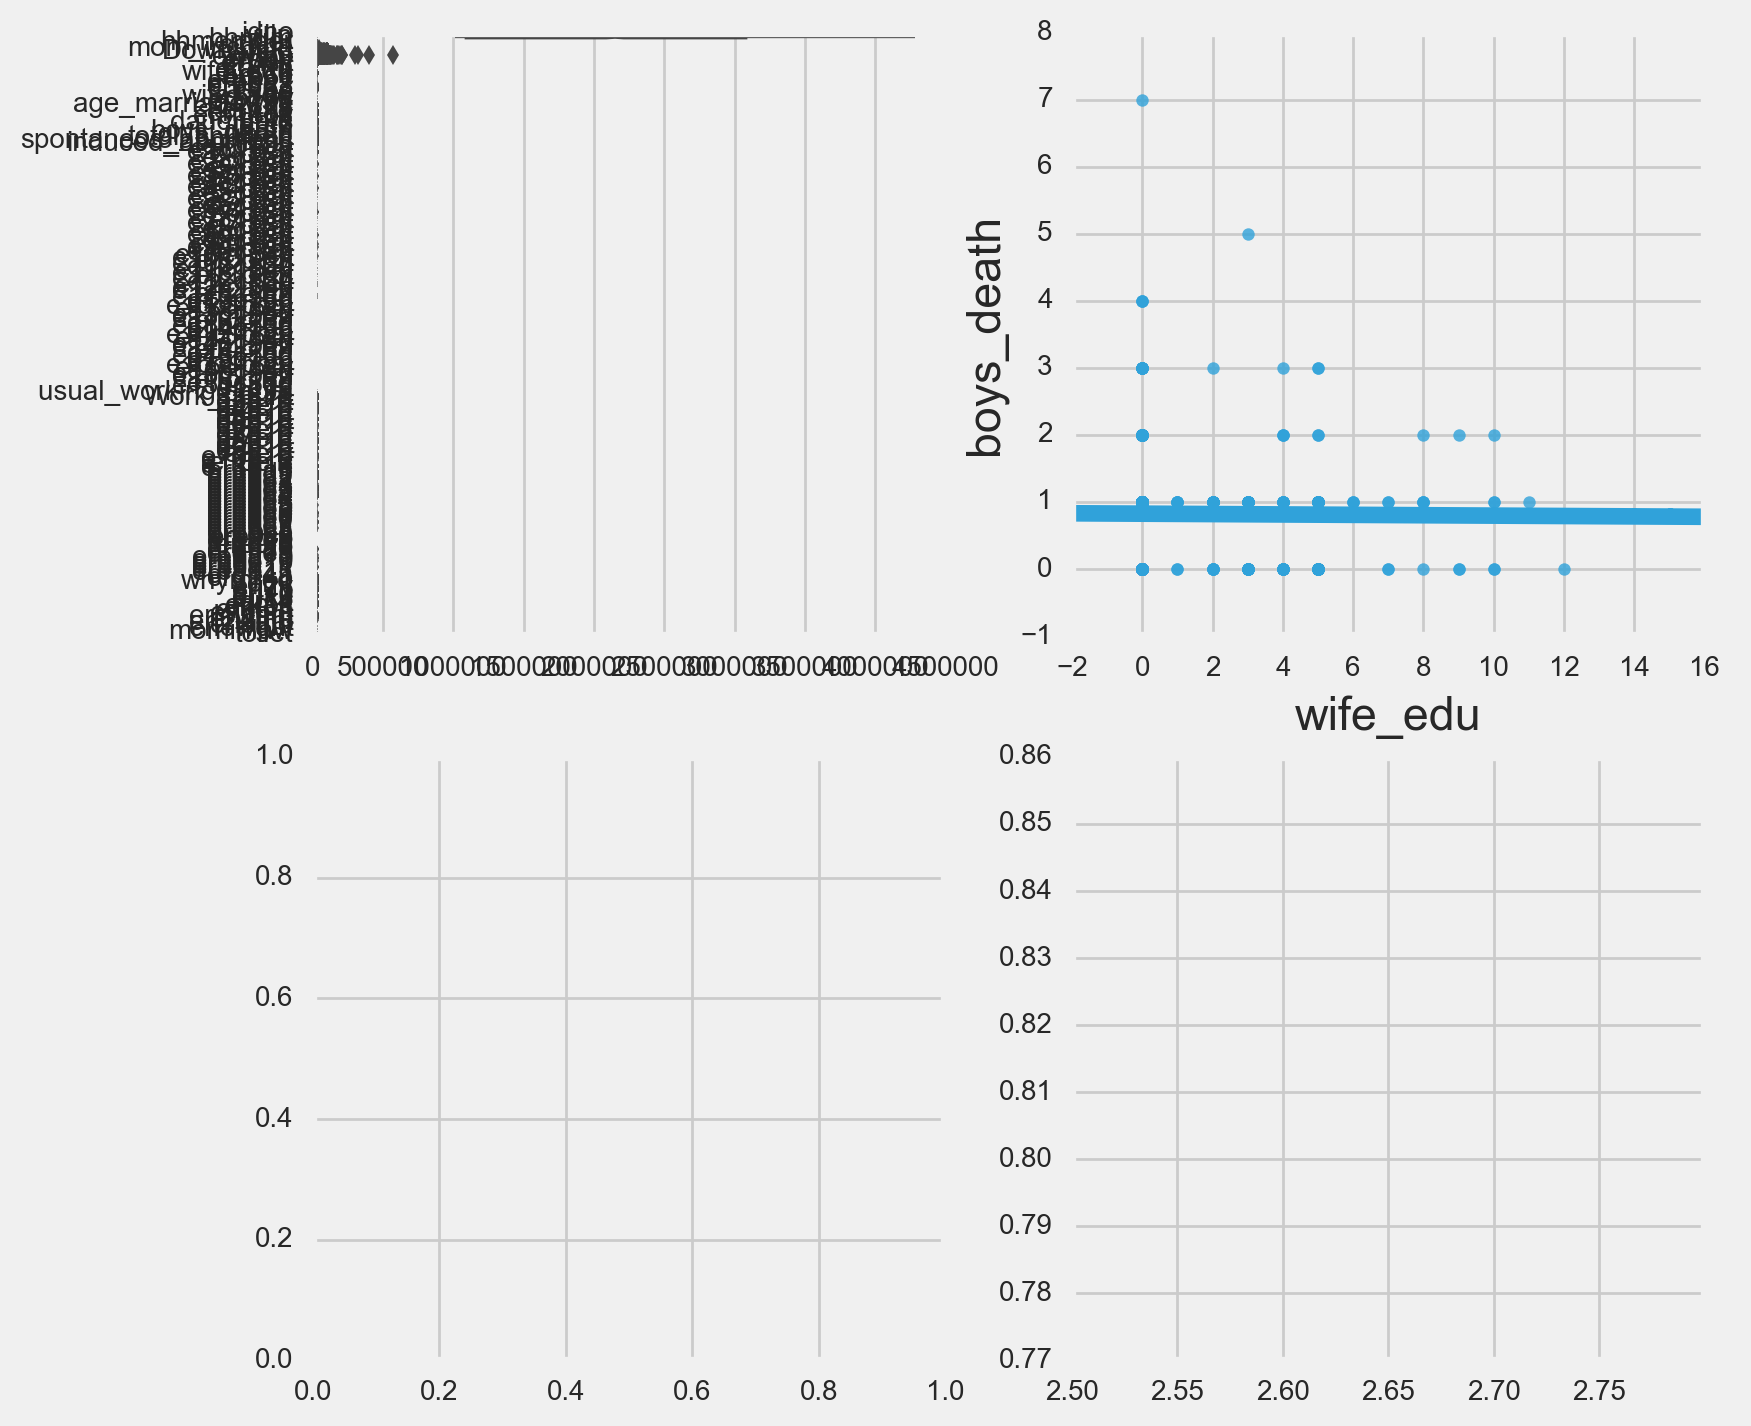

In [291]:
fig, axarr = plt.subplots(2, 2, figsize=(8,8),
                         sharex=False, sharey=False)
#ax = fig.gca()

axarr[0,0] = sns.boxplot(data=India, orient='h',
            fliersize=5, linewidth=3, notch=True, 
            saturation=0.5, ax=axarr[0,0])

axarr[0,1] = sns.regplot(India.wife_edu, India.boys_death, ax=axarr[0,1])

plt.show()


In [292]:
India = India.rename(index=str, columns={"erb13bs":"Spontaneous_abortions", "erb13bi":"Induced_abortions",})

In [293]:
India.corr()

,idno,villn,hhnum,hhmember,mom_income,erk6t,erwlno,erday,ervisit,era1h,...,erk8h,erk8m,erl1lno,erl1wght,erl2lno,erl2wght,erl3lno,erl3wght,mominlaw,toilet
idno,1.000000,0.438660,0.342349,0.302520,0.098616,0.169716,0.143276,-0.021287,-0.138721,-0.192339,...,-0.215909,0.036405,0.156204,-0.224611,0.023643,-0.297724,NaN,NaN,0.253872,NaN
villn,0.438660,1.000000,0.147564,0.120807,0.055676,0.053379,0.035310,0.035178,-0.097048,-0.119543,...,-0.119972,0.003448,-0.001193,-0.073691,-0.119212,0.004714,NaN,NaN,0.044201,NaN
hhnum,0.342349,0.147564,1.000000,0.038317,0.040549,0.020406,-0.000600,-0.095410,-0.038849,-0.098990,...,-0.116510,0.027475,0.165303,-0.169263,0.212496,-0.250138,NaN,NaN,0.030423,NaN
hhmember,0.302520,0.120807,0.038317,1.000000,0.034222,0.230369,0.625386,-0.029231,-0.022277,-0.072525,...,-0.079163,0.004530,0.352566,-0.091175,0.396625,0.090929,NaN,NaN,0.445084,NaN
mom_income,0.098616,0.055676,0.040549,0.034222,1.000000,0.068589,0.016742,-0.013084,-0.024006,-0.044959,...,-0.044828,-0.023003,-0.005594,-0.036196,0.237585,0.143429,NaN,NaN,0.038151,NaN
erk6t,0.169716,0.053379,0.020406,0.230369,0.068589,1.000000,0.237788,0.003709,-0.011707,-0.086433,...,-0.081961,0.001546,-0.007189,-0.074652,0.115185,-0.101977,NaN,NaN,0.205318,NaN
erwlno,0.143276,0.035310,-0.000600,0.625386,0.016742,0.237788,1.000000,-0.019942,-0.001610,-0.063041,...,-0.069683,0.007545,-0.212810,-0.065348,-0.202494,0.122597,NaN,NaN,0.449221,NaN
erday,-0.021287,0.035178,-0.095410,-0.029231,-0.013084,0.003709,-0.019942,1.000000,-0.002889,-0.036111,...,-0.016352,0.053783,-0.017439,0.007394,-0.056260,0.027614,NaN,NaN,-0.033196,NaN
ervisit,-0.138721,-0.097048,-0.038849,-0.022277,-0.024006,-0.011707,-0.001610,-0.002889,1.000000,0.049614,...,0.029389,-0.030543,-0.024623,0.010503,-0.027801,-0.035625,NaN,NaN,0.014483,NaN
era1h,-0.192339,-0.119543,-0.098990,-0.072525,-0.044959,-0.086433,-0.063041,-0.036111,0.049614,1.000000,...,0.952877,-0.070374,-0.055454,0.086528,0.146027,0.047096,NaN,NaN,-0.055861,NaN


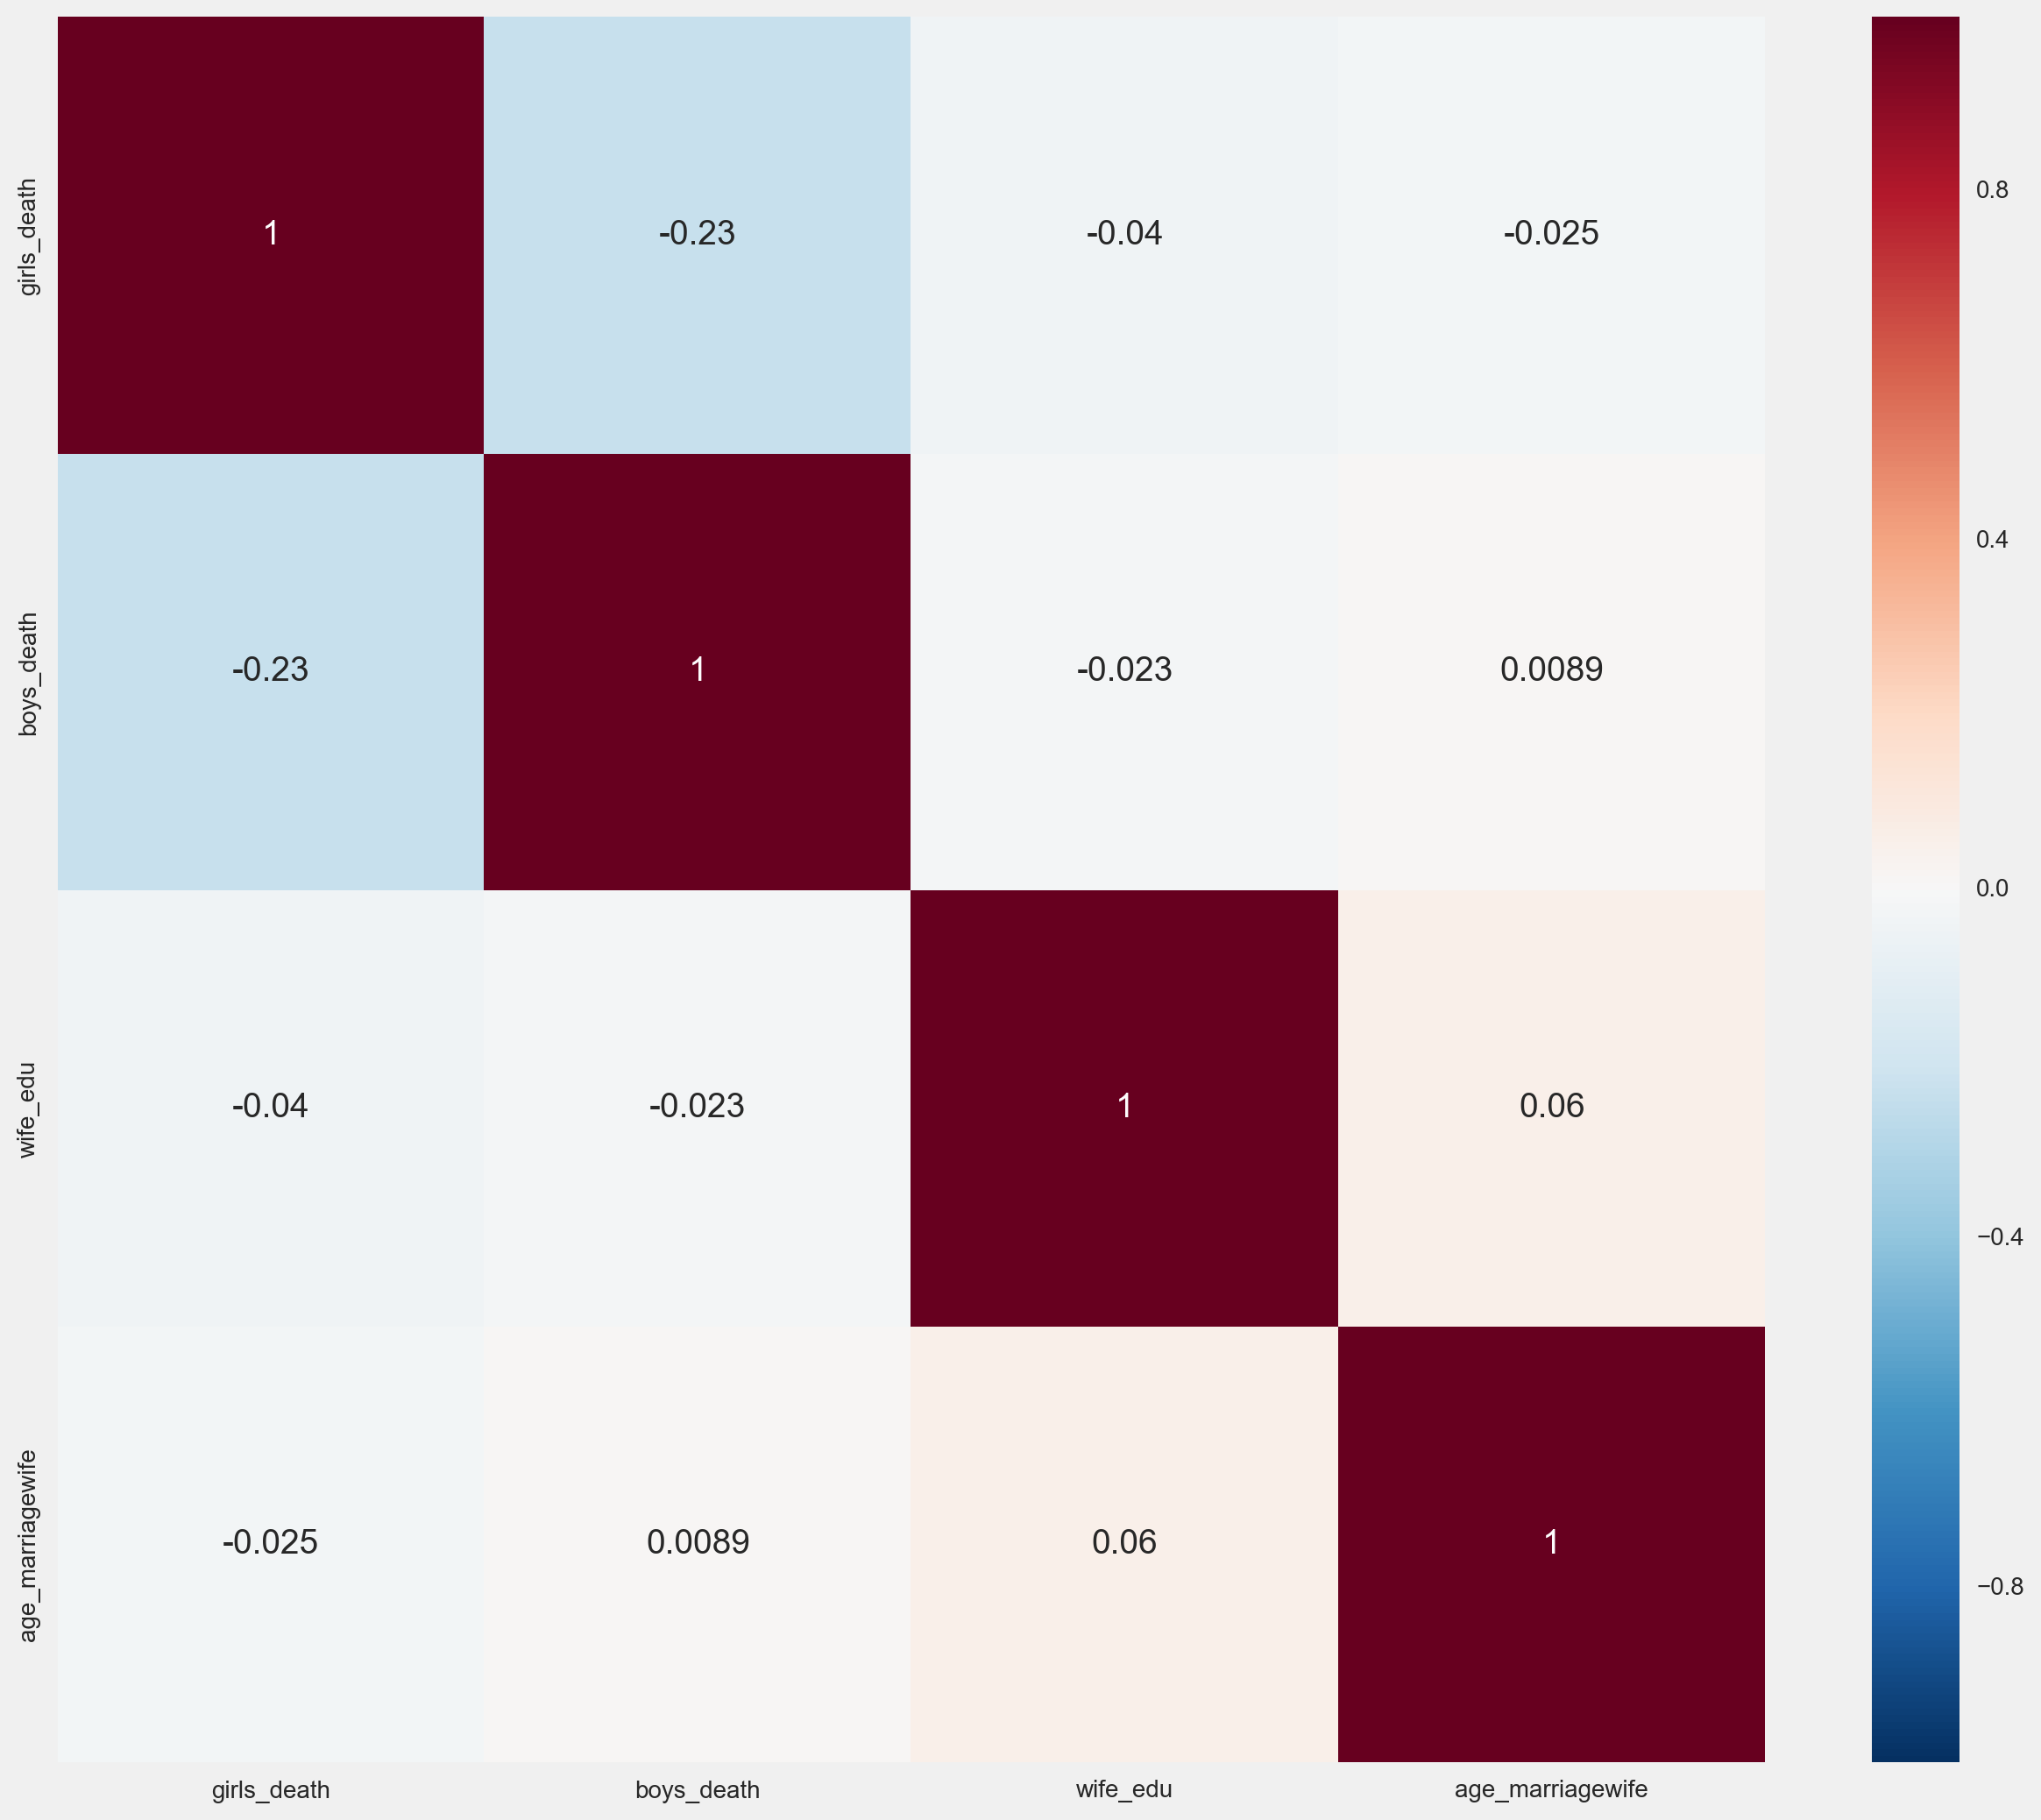

In [294]:
fig = plt.figure(figsize=(14,12))
ax = fig.gca()
sns.heatmap(India[['girls_death','boys_death','tiolet_type','wife_edu', 'source_water','age_marriagewife','fuel_used']].corr(),annot=True, ax=ax)
plt.show()

In [295]:
# age at marriage is negative corrrelated with girls death. Also total number of children are negatively correlated with age at marriage.

In [296]:
India.stillbirth=India.stillbirth.apply(lambda x: 1 if x =="yes" else 0 if x=="no" else x)

In [297]:
India.Used_pills=India.Used_pills.apply(lambda x: 1 if x =="yes" else 0 if x=="no" else x)

In [298]:
India.Idealnumber_girls=India.Idealnumber_girls.apply(lambda x: 0 if x =="sexnomat" else x)

In [299]:
India.Idealnumber_boys=India.Idealnumber_boys.apply(lambda x: 0 if x =="sexnomat" else x)

In [300]:
India.Years_livedinvillage=India.Years_livedinvillage.apply(lambda x: 38 if x =="always" else 0 if x=="<1yr" else x)

In [304]:
India.wife_bargaining=India.wife_bargaining.apply(lambda x: 1 if x =="yes" else 0 if x=="no" else x)

In [305]:
India.hus_bargaining=India.hus_bargaining.apply(lambda x: 1 if x =="yes" else 0 if x=="no" else x)

In [313]:
X = India[['induced_abortions','spontaneos_abortions','Idealnumber_girls','Idealnumber_boys','stillbirth','Used_pills','wife_edu','age_marriagewife','wife_age','Years_livedinvillage','daughters','mom_income','wife_bargaining','hus_bargaining']]
y = India.girls_death

In [314]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print X_train.shape, X_test.shape
print "\n======\n"
print y_train.shape, y_test.shape

(1712, 14) (734, 14)


(1712L,) (734L,)


In [315]:
from sklearn.linear_model import LinearRegression

## define a linear regression model
lr = LinearRegression()

## fit your model
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [316]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#         mean_squared_error(ytrain, ytrain_pred),
#         mean_squared_error(ytest, ytest_pred)))
# print('R^2 0LS train: %.3f, test: %.3f' % (
#         r2_score(ytrain, ytrain_pred),
#         r2_score(ytest, ytest_pred)))

In [317]:
def rsquare_meansquare_error(train_y, test_y, train_X, test_X, test, best_model):
    """ first we need to predict on the test and train data"""
    y_train_pred = best_model.predict(train_X)
    y_test_pred = best_model.predict(test_X)
    
    """ We call the MSE in the following lines"""
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))
    
    """ We call the R^2 in the following lines"""
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))

In [318]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "OLS", lr)

MSE OLS train data: 0.11, test data: 0.10
R^2 OLS train data: 0.02, test data: -0.02


In [319]:

from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [320]:
## Find the optimal alpha
ridge_alphas = np.logspace(0, 5, 100)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)
print (optimal_ridge.alpha_)

100000.0


In [321]:
## Implement the Ridge Regression
ridge = Ridge(alpha=optimal_ridge.alpha_)

## Fit the Ridge regression
ridge.fit(X_train, y_train)

Ridge(alpha=100000.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [322]:
## Evaluate the Ridge Regression
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Ridge", ridge)

MSE Ridge train data: 0.11, test data: 0.10
R^2 Ridge train data: 0.01, test data: -0.01


In [323]:
## Find the optimal alpha
optimal_lasso = LassoCV(n_alphas=300, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)
print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.0144583606433


...........................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s finished


In [324]:
## Implement the Lasso Regression
lasso = Lasso(alpha=optimal_lasso.alpha_)

## fit your regression
lasso.fit(X_train, y_train)

Lasso(alpha=0.014458360643337113, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [325]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Lasso", lasso)

MSE Lasso train data: 0.11, test data: 0.10
R^2 Lasso train data: 0.01, test data: -0.01


In [326]:
## Find the optimal alphas
l1_ratios = np.linspace(0.01, 1.0, 50)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5, verbose=1)
optimal_enet.fit(X_train, y_train)
print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

1.99796226165
0.01


.......................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   23.8s finished


In [327]:
##  Create a model Enet
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

## Fit your model
enet.fit(X_train, y_train)

ElasticNet(alpha=1.9979622616540638, copy_X=True, fit_intercept=True,
      l1_ratio=0.01, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [328]:
## Evaluate the Elastic Net Regression
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Elastic Net", enet)

MSE Elastic Net train data: 0.11, test data: 0.10
R^2 Elastic Net train data: 0.01, test data: -0.01


In [329]:
def best_reg_method(X, best_regulari):
    method_coefs = pd.DataFrame({'variable':X.columns, 
                                 'coef':best_regulari.coef_, 
                                 'abs_coef':np.abs(best_regulari.coef_)})
    method_coefs.sort_values('abs_coef', inplace=True, ascending=False)

    return method_coefs.head(10)

In [330]:
best_reg_method(X, lasso)

,abs_coef,coef,variable
8,0.004970,0.004970,wife_age
6,0.003433,-0.003433,wife_edu
2,0.000791,0.000791,Idealnumber_girls
9,0.000462,-0.000462,Years_livedinvillage
11,0.000004,0.000004,mom_income
0,0.000000,-0.000000,induced_abortions
1,0.000000,0.000000,spontaneos_abortions
3,0.000000,0.000000,Idealnumber_boys
4,0.000000,-0.000000,stillbirth
5,0.000000,-0.000000,Used_pills


In [331]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()


params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }

 
from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=5, verbose=1)

In [332]:
## Fit the regresion tree
dtr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   18.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'criterion': ['mse'], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [333]:
## Print Best Estimator, parameters and score
''' dtr_best = is the regression tree regressor with best parameters/estimators'''
dtr_best = dtr_gs.best_estimator_ 

print "best estimator", dtr_best
print "\n==========\n"
print "best parameters",  dtr_gs.best_params_
print "\n==========\n"
print "best score", dtr_gs.best_score_

best estimator DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': None, 'min_samples_split': 2, 'criterion': 'mse', 'max_depth': 3, 'min_samples_leaf': 3}


best score -0.0851375993731


In [334]:
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance

In [335]:
feature_importance(X, dtr_best)

,feature,importance
6,wife_edu,0.340127
2,Idealnumber_girls,0.262683
8,wife_age,0.194750
5,Used_pills,0.116970
7,age_marriagewife,0.045593
10,daughters,0.039877
0,induced_abortions,0.000000
1,spontaneos_abortions,0.000000
3,Idealnumber_boys,0.000000
4,stillbirth,0.000000


In [336]:
y_pred_dtr= dtr_best.predict(X_test)
y_pred_dtr

array([ 0.71655859,  0.71655859,  0.71655859,  0.71655859,  0.71643242,
        0.71655859,  1.01511279,  0.71655859,  0.79486542,  0.71655859,
        0.71655859,  1.01511279,  0.71655859,  0.71655859,  0.71655859,
        0.71655859,  1.01511279,  0.71643242,  0.71655859,  0.71655859,
        0.71655859,  0.71643242,  0.71655859,  0.71655859,  0.71655859,
        0.71655859,  0.71655859,  0.71655859,  0.71655859,  0.79486542,
        0.71655859,  0.71655859,  0.71655859,  0.71655859,  0.71655859,
        0.71655859,  0.71655859,  0.71655859,  0.71655859,  0.71655859,
        0.79486542,  0.71655859,  0.71655859,  0.71655859,  0.71655859,
        0.71655859,  0.71655859,  0.71643242,  0.71655859,  0.71655859,
        0.71655859,  0.71655859,  0.71643242,  0.79486542,  0.71655859,
        1.01511279,  0.71655859,  0.71655859,  0.79486542,  0.71643242,
        0.79486542,  0.71655859,  0.71655859,  0.71655859,  0.71655859,
        0.79486542,  0.71655859,  0.71655859,  0.71655859,  0.79

In [337]:
## Evaluate the Regression Tree performance on my train and test data
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Regression tree", dtr_best)

MSE Regression tree train data: 0.11, test data: 0.10
R^2 Regression tree train data: 0.05, test data: -0.06


In [338]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot

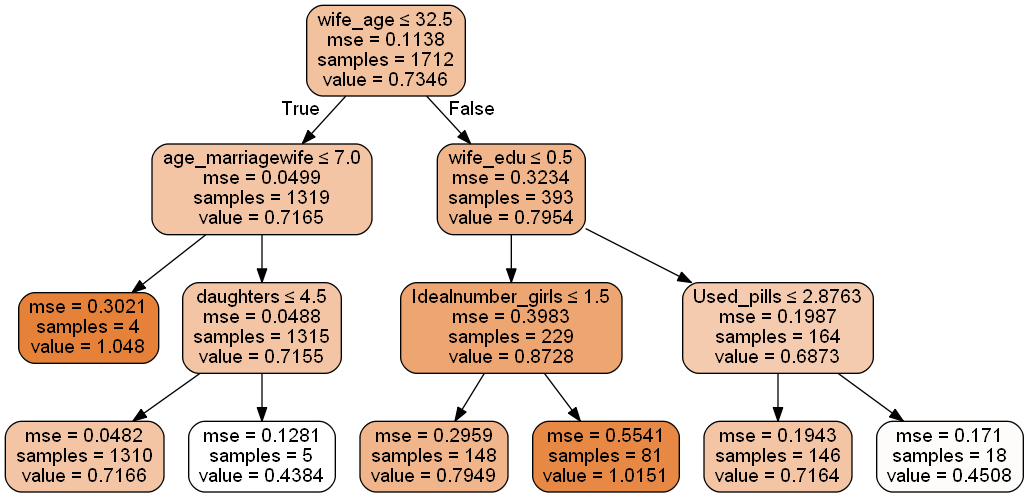

In [339]:
dot_data = StringIO()
''' dtr_best was previously defined'''

## Graph
export_graphviz(dtr_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [340]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5],  
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
          'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=1)

In [341]:
estimator_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   50.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 4], 'max_leaf_nodes': [5, 6, 7], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [342]:
## Print the best estimator, parameters and score
''' rfr_best = is the random forest regression tree regressor with best parameters/estimators'''
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=5, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


best parameters {'min_samples_split': 3, 'max_leaf_nodes': 5, 'n_estimators': 100, 'max_depth': 4}


best score -0.0203709165282


In [343]:
## Print the feauure importance
feature_importance(X, rfr_best)

,feature,importance
8,wife_age,0.231889
11,mom_income,0.213903
6,wife_edu,0.138246
3,Idealnumber_boys,0.108226
10,daughters,0.068782
2,Idealnumber_girls,0.065329
1,spontaneos_abortions,0.059853
9,Years_livedinvillage,0.058351
5,Used_pills,0.020930
7,age_marriagewife,0.012024


In [344]:
## Predict
y_pred_rfdtr= rfr_best.predict(X_test)
y_pred_rfdtr

array([ 0.71419378,  0.71627269,  0.72011693,  0.71725814,  0.7186868 ,
        0.71946497,  0.88291631,  0.71946497,  0.73787026,  0.71647827,
        0.71874172,  0.92336334,  0.71905597,  0.72337949,  0.7159853 ,
        0.71711502,  0.86458857,  0.73951416,  0.71905597,  0.71657828,
        0.719685  ,  0.74502862,  0.71905597,  0.72057662,  0.71946497,
        0.71933705,  0.71352193,  0.73738087,  0.71905597,  0.74515055,
        0.72047661,  0.71986781,  0.72000401,  0.71904966,  0.72047661,
        0.72024534,  0.74137315,  0.71905597,  0.72221084,  0.71905597,
        0.75245374,  0.72314572,  0.76687517,  0.71725814,  0.71946497,
        0.71905597,  0.71904966,  0.71655777,  0.71905597,  0.73565006,
        0.71725814,  0.71905597,  0.71497109,  0.79101326,  0.71725814,
        0.8170981 ,  0.71905597,  0.71905597,  0.76826005,  0.71844595,
        0.76446044,  0.71904966,  0.71821249,  0.71628029,  0.71905597,
        0.75855664,  0.72196207,  0.71905597,  0.71711502,  0.75

In [345]:
## Evaluate your model
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Random Forest Regression tree", rfr_best)

MSE Random Forest Regression tree train data: 0.10, test data: 0.10
R^2 Random Forest Regression tree train data: 0.09, test data: -0.05


# Report

# Research Question:
I aim to investigate the determinants of female child mortality among the sample of females in India. The data includes the demographic and fertility status, household bargaining power as well as women's education, income and household status from two years 1993-1994. I aim to answer what are the main or predictive indicators of female child mortality.

# Correlations:
I find that women's education and age at marriage are negatively correlated with female mortality as expected, we can conclude, the more educated the women is the less likely the girls are to die, because of proper care, and less number of self selective abortions. It also suggest that less age at marriage may lead to average age at marriage is 14 years, which may result in health complications and hence higher female mortality. These findings are consistent with male child mortality, however the slope of line showing the correlation between female mortality and these indicators is steeper. However these are only correlations and we cannot conclude causality.

# Models:
To determine the best predictors I use supervise learning technique and devide my sample in train and test data and run OLS, RIDGE, Lasso, ENT models. The findings from the model suggests, all the three models give similar r^2 for train and the test data data frame, however, also the MSE is almost same in all the three models, hence it is difficult to say that any one model is the best fit. The regression tree has the most predictive capacity based on the differences between r^2 of train and the test data. 

Since the numbers are not doing a very good job of explaining which model works, the theory or the mechanism of the models can be used to decide the validity of models in our case, Ridge works well even in presence of highly correlated features as it will include all of them in the model but the coefficients will be distributed among them depending on the correlation. I case of Lasso, it arbitrarily selects any one feature among the highly correlated ones and reduced the coefficients of the rest to zero. Also, the chosen variable changes randomly with change in model parameters. This generally doesn’t work that well as compared to ridge regression. Hence in this case I might conclude that Ridge will work better as their are highly correlated variables, like mother's education and income and thus bargaining power so there will be issue of multicolinearity.

# Conclusions: 
1.Women's education is most important predictor of child mortality.
2.The best predictors of female child mortality are found to be mother's education, income, age at marriage and very interesting the ideal number of boys and ideal number of girls.
3.The coefficients on ideal number of boys is positive correlated with death of girls, which is consistent with literature.Ideal number os girls is also founf to positively related to girls death which is interesting. 
4.Women's bargining power is not very strong indicator of female mortality, which makes sense becuase women's personal choice of having a daughter is based on education which is consistent with the findings. 
5.These findings are consistent with literature of sex selective abortions in India as well as girls being in larger families on an average because of birth pausing after a boy is born. 





